In [64]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

* Scopus 검색
* 키워드: UAM
* 검색 조건: Authors, Title, Year, Abstract, Keywords 검색 / 연도: 2014~2023(최근 10년도 논문만 포함) / English / Article과 Conference paper만 포함/ 키워드 배제: 동음이의어인 Ultrasonic Additive Manufacturing와 유사 키워드인 Ultrasonic Applications, Ultrasonic Effects, Additive Manufacturing, Ultrasonic Waves, Ultrasonic Welding, Ultrasonic Vibration, Ultrasonic-assisted Millings 제외하고 검색
* 총 1,028 documents

In [65]:
data = pd.read_csv('scopus_UAM_20230511.csv')
data

,Authors,Title,Year,Link,Abstract,Author Keywords
0,"Singh A., Lodge A., Li Y., Widanage W.D., Bara...",A new method to perform lithium-ion battery pa...,2023,https://www.scopus.com/inward/record.uri?eid=2...,Electric Vertical Take-Off and Landing (eVTOL)...,Electric aircraft; eVTOL; Fast charging; Fault...
1,"Wang S., Zhai Y., Zhan X.",Implementation of solution separation-based Ka...,2023,https://www.scopus.com/inward/record.uri?eid=2...,Accurate and safety-assured navigation is dema...,Integrity monitoring; Kalman filter; Multi-sen...
2,"Ariza-Montes A., Quan W., Radic A., Koo B., Ki...",nderstanding the behavioral intention to use u...,2023,https://www.scopus.com/inward/record.uri?eid=2...,"In the following years, Urban Air Mobility (UA...",Covariance-based structural equation modeling;...
3,"Yeo H., Lee S.",Impact of heterogeneous building arrangement o...,2023,https://www.scopus.com/inward/record.uri?eid=2...,Turbulent wakes and the recirculatory flow ind...,Atmospheric boundary layer; Building arrangeme...
4,"Husemann M., Lahrs L., Stumpf E.",The impact of dispatching logic on the efficie...,2023,https://www.scopus.com/inward/record.uri?eid=2...,The application of electrified propulsion syst...,Dispatching; Transportation simulation; Urban ...
...,...,...,...,...,...,...
1023,"Rochman D., Sciolla C.M.",Nuclear data uncertainty propagation for a typ...,2014,https://www.scopus.com/inward/record.uri?eid=2...,The effects of nuclear data uncertainties are ...,Fast TMC; Nuclear data; Uncertainty
1024,"Zwermann W., Aures A., Gallner L., Hannstein V...",Nuclear data uncertainty and sensitivity analy...,2014,https://www.scopus.com/inward/record.uri?eid=2...,Uncertainty and sensitivity analyses with resp...,Fast GRS method; Fuel assembly depletion; Rand...
1025,"Wang J., Zou D., Zheng H., Zhao H., Liu H., Ji...",Genetic relationships between plant height and...,2014,https://www.scopus.com/inward/record.uri?eid=2...,Plant height (PH) has strong genetic associati...,NaN
1026,"Alshar'e M.I., Sulaiman R., Mukhtar M.R., Zin ...",A user protection model for the trusted comput...,2014,https://www.scopus.com/inward/record.uri?eid=2...,Information security presents a huge challenge...,Authentication; Biometrics; Privacy; Security;...


In [66]:
data['Year'].isnull().sum()
#결측치 없음

0

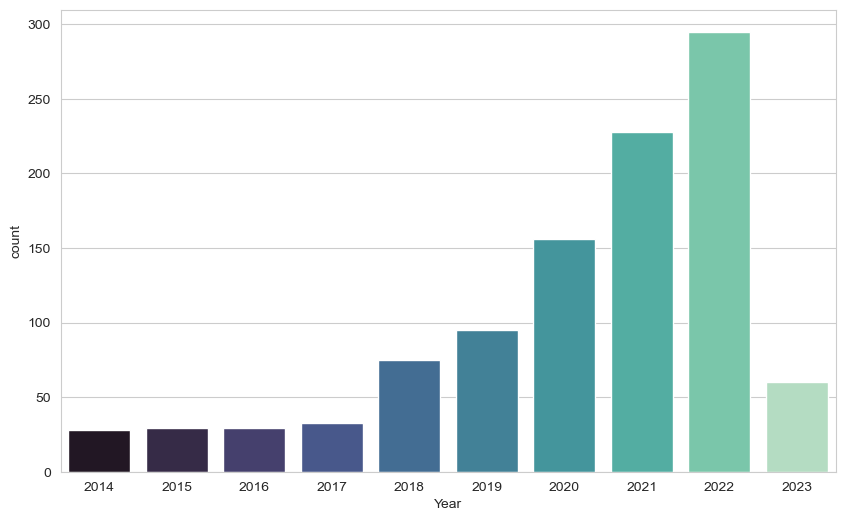

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize = (10,6))

sns.countplot(x = data['Year'], palette = 'mako')
plt.show()

In [68]:
country_data = pd.read_csv('국가별 논문 수.csv')
country_data

,Country,count
0,United States,454
1,China,90
2,Germany,90
3,Spain,70
4,South Korea,69
...,...,...
60,South Africa,1
61,Thailand,1
62,Uruguay,1
63,Venezeula,1


In [69]:
rank = country_data['count'] >= 5
rank.value_counts()

count
False    35
True     30
Name: count, dtype: int64

In [70]:
country_data.drop(country_data.index[29:], axis = 0, inplace = True)
country_data

,Country,count
0,United States,454
1,China,90
2,Germany,90
3,Spain,70
4,South Korea,69
5,United Kingdom,43
6,Italy,41
7,Mexico,37
8,France,30
9,Canada,25


<Axes: xlabel='count', ylabel='Country'>

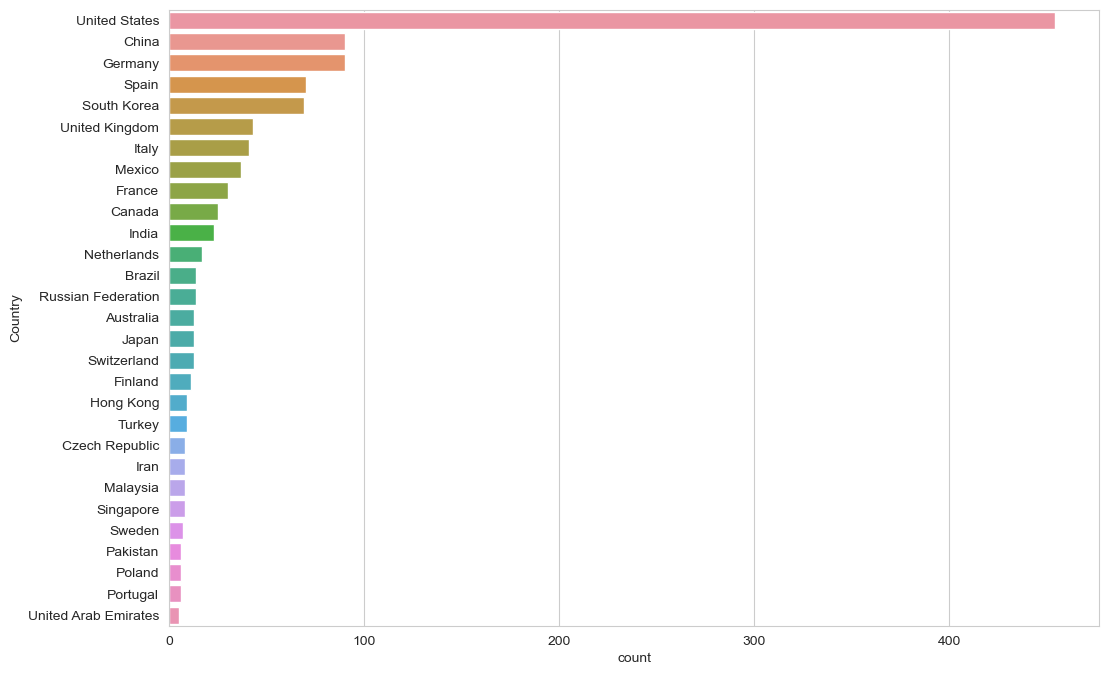

In [71]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'count', y = 'Country', data = country_data)

In [72]:
data_ab = data['Abstract']
data_ab

0       Electric Vertical Take-Off and Landing (eVTOL)...
1       Accurate and safety-assured navigation is dema...
2       In the following years, Urban Air Mobility (UA...
3       Turbulent wakes and the recirculatory flow ind...
4       The application of electrified propulsion syst...
                              ...                        
1023    The effects of nuclear data uncertainties are ...
1024    Uncertainty and sensitivity analyses with resp...
1025    Plant height (PH) has strong genetic associati...
1026    Information security presents a huge challenge...
1027    Vehicular pollution, emissions due to burning ...
Name: Abstract, Length: 1028, dtype: object

## 데이터 전처리

### Tokenization

#### 노이즈 및 불용어 제거

In [73]:
import nltk
from nltk.corpus import stopwords

In [74]:
# 불용어 지정
my_stopword =stopwords.words('english') + ['research', 'implication', 'UAM', 'urban', 'air', 'mobility', 'paper', 'study', 'analysis', 'method', 'model', 'data']
print(my_stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words = my_stopword, 
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(data_ab)

# LDA 토픽 모델링 실행

### 사이킷런을 이용한 토픽 모델링

In [76]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수
                                max_iter=5, 
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online', 
                                n_jobs= -1, #사용 processor 수
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('#shape of review_topics:', review_topics.shape)
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)

#shape of review_topics: (1028, 10)
#Sample of review_topics: [0.45  0.255 0.019 0.017 0.07  0.017 0.029 0.103 0.018 0.022]
#Sum of topic weights of documents: [0.18  0.104 0.048 0.103 0.065 0.064 0.044 0.238 0.106 0.048]
#shape of topic word distribution: (10, 2000)


In [77]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: aircraft, noise, flight, electric, design, vehicle, vertical, evtol, vehicles, landing
Topic #1: proposed, physical, system, systems, information, user, provide, level, security, based
Topic #2: markers, associated, identified, using, genetic, 2014, used, years, significant, association
Topic #3: uncertainties, uncertainty, code, nuclear, calculations, fuel, benchmark, sensitivity, performed, based
Topic #4: use, drones, public, acceptance, risk, well, drone, towards, implementation, environmental
Topic #5: results, conditions, flow, wind, tunnel, students, weather, three, using, used
Topic #6: system, safety, performance, based, case, aircraft, assurance, design, resources, component
Topic #7: operations, traffic, airspace, transportation, demand, new, management, system, aircraft, vehicles
Topic #8: temperature, results, used, methods, 2014, care, effect, different, process, water
Topic #9: based, quality, aerial, optimization, spectrum, algorithm, learning, networks, time,

n_components: 6, perplexity: 1252.988
n_components: 7, perplexity: 1241.537
n_components: 8, perplexity: 1256.191
n_components: 9, perplexity: 1259.986
n_components: 10, perplexity: 1299.890
n_components: 11, perplexity: 1321.338
n_components: 12, perplexity: 1326.382
n_components: 13, perplexity: 1325.096
n_components: 14, perplexity: 1349.551
n_components: 15, perplexity: 1358.036


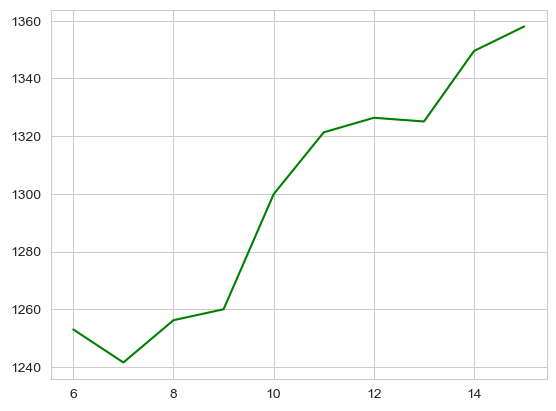

n_components with minimum perplexity: 7


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))

In [125]:
lda = LatentDirichletAllocation(n_components = 6, #추출할 topic의 수를 지정
                                max_iter=20, 
                                topic_word_prior= 0.1, 
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1, 
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: proposed, system, based, control, systems, performance, aerial, uas, safety, unmanned
Topic #1: based, using, used, obtained, results, first, cell, number, different, algorithm
Topic #2: aircraft, flight, noise, design, electric, vehicle, rotor, vehicles, vertical, performance
Topic #3: uncertainty, uncertainties, nuclear, parameters, fuel, cross, code, core, power, benchmark
Topic #4: use, results, methods, used, rate, also, different, using, lower, however
Topic #5: operations, traffic, transportation, demand, airspace, aircraft, new, vehicles, landing, areas



### 토픽 트렌드로 시간에 따른 주제의 변화 알아내기

In [127]:
# 토픽 트렌드를 찾기 위해서는 각 문서의 날짜(start)와 토픽 분포를 결합해야 한다.
# 날짜에서 연도와 월만 잘라 가져온다.
trend_data = pd.DataFrame(review_topics, columns = ['Topic'+str(i) for i in range(1, 7)])
trend_data = pd.concat([trend_data, data.Year], axis = 1)
trend_data

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Year
0,0.283004,0.066064,0.191609,0.027382,0.070058,0.361883,2023
1,0.870039,0.049446,0.013974,0.032087,0.018020,0.016435,2023
2,0.026866,0.147923,0.031418,0.184547,0.361393,0.247853,2023
3,0.023746,0.637742,0.235197,0.026337,0.022557,0.054421,2023
4,0.108779,0.018961,0.109177,0.015178,0.035195,0.712711,2023
...,...,...,...,...,...,...,...
1023,0.018467,0.176621,0.019437,0.699584,0.062776,0.023115,2014
1024,0.034881,0.062346,0.021176,0.806313,0.053502,0.021782,2014
1025,0.019644,0.352864,0.029357,0.019805,0.552818,0.025512,2014
1026,0.385346,0.116381,0.064489,0.197992,0.139612,0.096180,2014


In [128]:
trend = trend_data.groupby(['Year']).mean()
trend

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6
Year,,,,,,
2014,0.068615,0.166451,0.040652,0.436623,0.224631,0.063027
2015,0.080204,0.251419,0.048062,0.219023,0.362368,0.038925
2016,0.072373,0.220251,0.037417,0.419837,0.222560,0.027561
2017,0.090080,0.341497,0.047940,0.165673,0.248689,0.106121
2018,0.112401,0.108018,0.167426,0.149261,0.217108,0.245786
2019,0.150679,0.128901,0.192246,0.114929,0.170817,0.242428
2020,0.185002,0.091147,0.203244,0.118953,0.131180,0.270475
2021,0.171103,0.089118,0.245966,0.055244,0.140790,0.297779
2022,0.222149,0.070740,0.244589,0.053011,0.132653,0.276858


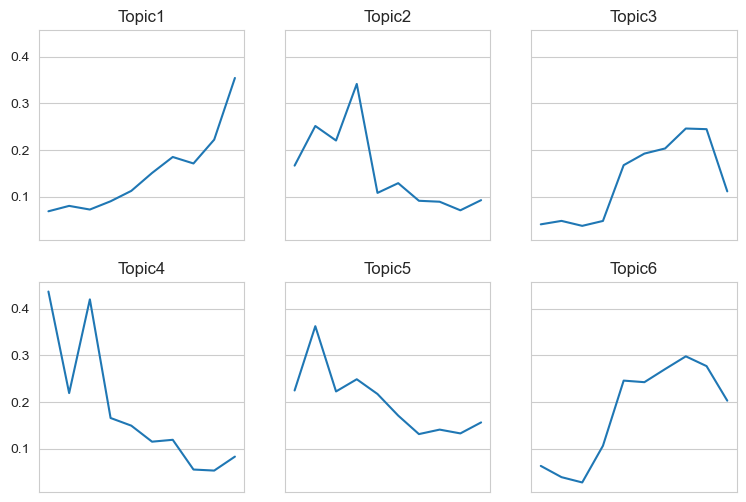

In [157]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 3,  sharex = 'all', sharey = 'all', figsize = (9,6))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()

* Topic 2,4,5는 점차 감소하는 추세이며(Cold Topic), Topic 1,3,6은 증가하는 추세(Hot Topic)를 보인다

### Gensim을 이용한 토픽 모델링

In [102]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in my_stopword) and len(word) > 2]
    return words

abstract = [tokenizer(data_ab) for data_ab in data_ab]

In [103]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(abstract)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in abstract]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 12708
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 1028


In [104]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: total: 3.41 s
Wall time: 3.4 s


In [105]:
model.print_topics(num_words=10)

[(0,
  '0.016*"operations" + 0.014*"flight" + 0.013*"aircraft" + 0.011*"airspace" + 0.009*"system" + 0.009*"systems" + 0.008*"traffic" + 0.006*"rights" + 0.006*"reserved" + 0.006*"management"'),
 (1,
  '0.009*"care" + 0.008*"students" + 0.007*"performance" + 0.006*"education" + 0.006*"system" + 0.005*"models" + 0.005*"based" + 0.005*"communications" + 0.005*"using" + 0.005*"use"'),
 (2,
  '0.010*"results" + 0.008*"use" + 0.008*"time" + 0.007*"demand" + 0.006*"lower" + 0.006*"using" + 0.006*"complexity" + 0.005*"information" + 0.005*"new" + 0.005*"trips"'),
 (3,
  '0.010*"vehicle" + 0.009*"design" + 0.008*"transportation" + 0.007*"vehicles" + 0.007*"electric" + 0.006*"vertiport" + 0.006*"systems" + 0.006*"results" + 0.005*"potential" + 0.005*"new"'),
 (4,
  '0.017*"design" + 0.015*"aircraft" + 0.009*"electric" + 0.009*"performance" + 0.008*"flight" + 0.008*"vertical" + 0.008*"based" + 0.008*"vehicle" + 0.007*"results" + 0.007*"noise"'),
 (5,
  '0.023*"control" + 0.013*"system" + 0.012*"

In [106]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(5, 0.7331225), (6, 0.25939685)]


In [107]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.100231 -0.013611       1        1  16.462226
0     -0.067228 -0.005091       2        1  15.475401
7      0.174037  0.006987       3        1  13.495186
4     -0.014307  0.087839       4        1  10.567271
5      0.017091  0.112426       5        1   9.441186
8     -0.061521  0.014211       6        1   9.263529
3     -0.030205 -0.035675       7        1   8.267258
9      0.039838  0.000885       8        1   7.863295
2      0.029354 -0.099698       9        1   5.784508
1      0.013171 -0.068273      10        1   3.380140, topic_info=               Term        Freq       Total Category  logprob  loglift
1145          noise  356.000000  356.000000  Default  30.0000  30.0000
472     uncertainty  290.000000  290.000000  Default  29.0000  29.0000
338         control  384.000000  384.000000  Default  28.0000  28.0000
200   uncertainties  227.000000  227.000000  Default  27.0000  27.0000
1330          rotor  225.000000  225.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
199             two   12.000165  278.337151  Topic10  -5.6060   0.2433
256           three   11.283428  180.166257  Topic10  -5.6675   0.6167
195            time   12.415264  432.626980  Topic10  -5.5719  -0.1637
77             work   10.595735  224.192667  Topic10  -5.7304   0.3352
140         systems   10.684383  457.058679  Topic10  -5.7221  -0.3688

[680 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
885       1  0.095903   2012
885       2  0.047951   2012
885       3  0.047951   2012
885       5  0.191806   2012
885       8  0.047951   2012
...     ...       ...    ...
871       2  0.059273  yield
871       3  0.355636  yield
871       4  0.059273  yield
871       8  0.059273  yield
871      10  0.296364  yield

[3369 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 8, 5, 6, 9, 4, 10, 3, 2])

In [108]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.8253586746084025


num_topics: 6, perplexity: -7.588, coherence: -2.352
num_topics: 7, perplexity: -7.581, coherence: -2.689
num_topics: 8, perplexity: -7.579, coherence: -2.678
num_topics: 9, perplexity: -7.606, coherence: -2.980
num_topics: 10, perplexity: -7.652, coherence: -3.128
num_topics: 11, perplexity: -7.663, coherence: -2.812
num_topics: 12, perplexity: -7.747, coherence: -2.927
num_topics: 13, perplexity: -7.781, coherence: -3.320
num_topics: 14, perplexity: -7.789, coherence: -2.929
num_topics: 15, perplexity: -7.834, coherence: -3.537


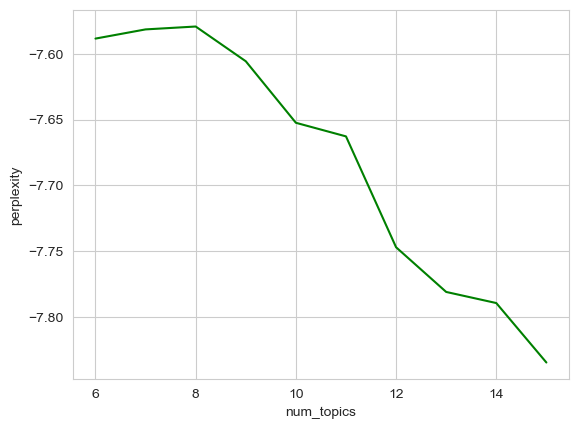

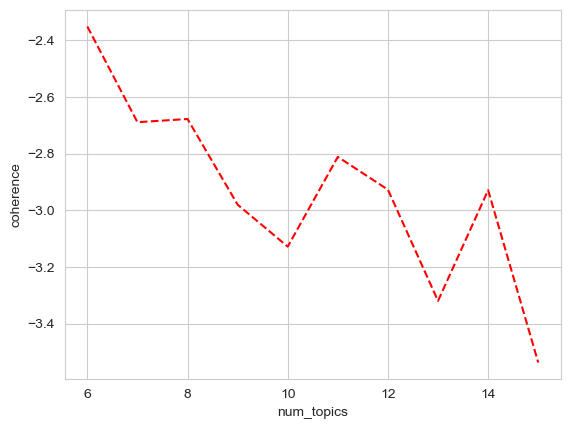

In [109]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=6, end=15)

* 혼란도는 토픽 수가 커질수록 좋은 경향성을 보이고, 토픽 응집도는 6일 때 가장 좋다.

In [122]:
from gensim.models import LdaModel

num_topics = 6 # 혼란도와 토픽 응집도 분포에 따라 토픽의 개수를 10개에서 6개로 조정
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: total: 3.41 s
Wall time: 3.39 s


In [123]:
model.print_topics(num_words=10)

[(0,
  '0.013*"operations" + 0.012*"aircraft" + 0.012*"airspace" + 0.012*"flight" + 0.010*"traffic" + 0.009*"system" + 0.007*"systems" + 0.006*"based" + 0.006*"safety" + 0.006*"uas"'),
 (1,
  '0.008*"based" + 0.007*"using" + 0.006*"safety" + 0.006*"performance" + 0.005*"results" + 0.005*"assurance" + 0.005*"case" + 0.005*"process" + 0.005*"used" + 0.004*"systems"'),
 (2,
  '0.008*"results" + 0.008*"noise" + 0.007*"use" + 0.007*"time" + 0.007*"using" + 0.005*"used" + 0.005*"based" + 0.005*"different" + 0.004*"also" + 0.004*"two"'),
 (3,
  '0.008*"transportation" + 0.007*"vehicles" + 0.007*"new" + 0.006*"system" + 0.006*"design" + 0.006*"vehicle" + 0.005*"systems" + 0.005*"potential" + 0.005*"demand" + 0.005*"results"'),
 (4,
  '0.015*"aircraft" + 0.014*"design" + 0.013*"noise" + 0.009*"based" + 0.009*"electric" + 0.008*"performance" + 0.007*"vehicles" + 0.007*"flight" + 0.007*"vertical" + 0.007*"vehicle"'),
 (5,
  '0.013*"uncertainty" + 0.011*"control" + 0.011*"uncertainties" + 0.008*"p

In [124]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.024231  0.064241       1        1  25.964562
3      0.054391  0.024847       2        1  19.944220
4     -0.036253  0.056412       3        1  18.233250
5     -0.120435 -0.029755       4        1  17.426536
2      0.051372 -0.054979       5        1  10.563921
1      0.026695 -0.060766       6        1   7.867511, topic_info=               Term        Freq       Total Category  logprob  loglift
472     uncertainty  279.000000  279.000000  Default  30.0000  30.0000
1145          noise  377.000000  377.000000  Default  29.0000  29.0000
200   uncertainties  217.000000  217.000000  Default  28.0000  28.0000
372        airspace  361.000000  361.000000  Default  27.0000  27.0000
451         nuclear  132.000000  132.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
71              use   23.779758  309.551434   Topic6  -5.7669  -0.0239
199             two   22.693842  275.675824   Topic6  -5.8136   0.0453
44            level   21.996057  196.150203   Topic6  -5.8448   0.3544
113      management   22.089215  228.243782   Topic6  -5.8406   0.2071
36          however   21.642984  232.006699   Topic6  -5.8610   0.1703

[430 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1707      1  0.052766       100
1707      2  0.105533       100
1707      3  0.079150       100
1707      4  0.026383       100
1707      5  0.263832       100
...     ...       ...       ...
1939      5  0.045330  workload
1641      1  0.108890     xsusa
1641      3  0.054445     xsusa
1641      4  0.816672     xsusa
1641      6  0.054445     xsusa

[1624 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 6, 3, 2])

In [147]:
# 키워드 네트워크 분석
!pip install networkx

In [148]:
import re
import networkx as nx